# Сборный проект —2

**Описание проекта:**

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 


**Цель исследования:**

Первая цель — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Вторая цель — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Задача исследования:**

_Задача 1:_ предсказание уровня удовлетворённости сотрудника
Для этой задачи заказчик предоставил данные с признаками:

_Задача 2:_ предсказание увольнения сотрудника из компании
Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

**Исходные данные:**

_**Для задачи 1:**_

Тренировочная выборка:
**`"train_job_satisfaction_rate.csv"`**

Входные признаки тестовой выборки:
**`"test_features.csv"`**

Целевой признак тестовой выборки:
**`"test_target_job_satisfaction_rate.csv"`**

_**Для задачи 2:**_

Тренировочная выборка:
**`"train_quit.csv"`**

Входные признаки тестовой выборки те же, что и в прошлой задаче:
**`"test_features.csv"`**

Целевой признак тестовой выборки:
**`"test_target_quit.csv"`**

* `id` — уникальный идентификатор сотрудника;
* `dept` — отдел, в котором работает сотрудник;
* `level` — уровень занимаемой должности;
* `workload` — уровень загруженности сотрудника;
* `employment_years` — длительность работы в компании (в годах);
* `last_year_promo` — показывает, было ли повышение за последний год;
* `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
* `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
* `salary` — ежемесячная зарплата сотрудника;
* `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

    
**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, загрузка библиотек.](#info1)
* [2. Получение общей информации.](#info2)

***Часть 2. Подготовка данных:***
* [1. Нахождение и ликвидация дубликатов.](#preparation1)
* [2. Нахождение и ликвидация пропусков.](#preparation2)


***Часть 3. Исследовательский анализ:***
* [1. Построение графиков.](#analysis1)
* [2. Категориальные графики.](#analysis2)
* [3. Корреляционный анализ. Построение тепловой карты.](#correlation)

***Часть 4. Использование пайплайнов:***
* [Подготовка данных.](#split)

***Часть 5. Обучение и определение лучшей модели:***
* [1. Предсказание уровня удовлетворённости сотрудника.](#result1)
* [2. Предсказание увольнения сотрудника из компании.](#result2)

***[Часть 6. Вывод.](#conclusion)***

## Изучение общей информации

<a id='info1'></a>
### Загрузка библиотек

In [1]:
!pip install phik -q
!pip install shap -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
import shap

from scipy import stats as st
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 42

label_encoder = LabelEncoder()

### Загрузка данных

In [3]:
try:
    train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    train_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    test_target_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
try:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
except:
    train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    test_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

<a id='info2'></a>
### Обзор данных

In [5]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [6]:
train_job_satisfaction_rate.sample(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
3834,221485,technology,junior,medium,2,no,no,3,34800,0.43
3680,671929,technology,junior,medium,1,no,no,4,31200,0.68
2013,523467,purchasing,middle,medium,2,no,no,4,44400,0.72
2804,588486,sales,junior,medium,4,no,yes,3,27600,0.38
336,637383,purchasing,junior,medium,2,no,no,4,25200,0.75


In [7]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [8]:
test_features.sample(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1108,178771,technology,middle,high,5,no,yes,2,55200
152,700991,technology,middle,medium,1,no,no,4,46800
323,608114,technology,middle,high,2,no,no,4,69600
313,357629,sales,junior,low,1,no,no,2,12000
228,348960,marketing,middle,low,3,no,no,4,20400


In [9]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [10]:
test_target_job_satisfaction_rate['job_satisfaction_rate'].describe()

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

In [11]:
test_target_job_satisfaction_rate.sample(5)

,id,job_satisfaction_rate
1899,923671,0.88
325,793187,0.64
787,826023,0.75
817,603262,0.73
529,159162,0.72


In [12]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [13]:
train_quit.sample(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3058,370772,sales,junior,medium,3,no,no,1,24000,yes
3132,141249,technology,junior,medium,2,no,no,3,26400,no
3159,206962,technology,junior,medium,1,no,no,3,30000,yes
3193,512425,purchasing,middle,high,3,no,no,4,58800,no
2825,301203,sales,junior,high,1,no,no,5,34800,no


In [14]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [15]:
test_target_quit.sample(5)

,id,quit
1852,358227,yes
1578,307847,no
39,869744,no
1112,788110,yes
1721,722930,no


In [16]:
test_target_quit['quit'].value_counts()

no     1436
yes     564
Name: quit, dtype: int64

**Вывод:** Получены данные в виде 5 таблиц для двух задач уже разделенных на тренировочные, тестовые выборки и целевые: 
* `"train_job_satisfaction_rate.csv"` - таблица с тренировочными данными для задачи 1. Состоит из 10 столбцов(дробь(1), число(4), строка(5)) по 4000 строк. Из инфо видны пропуски в колонке `dept` - 6 ячеек и `level` - 4 ячейки.
* `"test_features.csv"` - таблица с тестовыми данными из 9 столбцов(число(4), строка(5)) по 2000 строк. Из инфо видны пропуски в колонке `dept` - 2 ячейки и `level` - 1 ячейка.
* `"test_target_job_satisfaction_rate.csv"` - таблица с целевыми данными для задачи 1 из 2 столбцов(число(2)) по 2000 строк. Пропусков не обнаружено. Все числа в диапазоне от 0 до 1.

* `"train_quit.csv"` - таблица с тренировочными данными для задачи 2. Состоит из 10 столбцов(число(4), строка(6)) по 4000 строк. Пропусков не обнаружено.
* `"test_target_quit.csv"` - таблица с целевыми данными для задачи 2 из 2 столбцов(число(1), строка(1)) по 2000 строк. Пропусков не обнаружено.

*На первый взгляд все данные в отличном состоянии, пропусков мало, заполнены верно, названия колонок и типов данных не требуют изменений.*

##  Предобработка данных

<a id='preparation1'></a>
### Поиск и удаление дубликатов

In [17]:
train_job_satisfaction_rate.duplicated().sum()

0

In [18]:
test_features.duplicated().sum()

0

In [19]:
test_target_job_satisfaction_rate.duplicated().sum()

0

In [20]:
train_quit.duplicated().sum()

0

In [21]:
test_target_quit.duplicated().sum()

0

In [22]:
def unique_print(data, table_list):
        for i in table_list:
            try:
                print(i, data[i].unique())
            except LookupError:
                print('Нету')

In [23]:
table_list = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

In [24]:
unique_print(train_job_satisfaction_rate, table_list)

dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'high' 'low']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']
Нету


In [25]:
unique_print(test_features, table_list)

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'low' 'high' ' ']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']
Нету


In [26]:
unique_print(train_quit, table_list)

dept ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level ['middle' 'junior' 'sinior']
workload ['high' 'medium' 'low']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']
quit ['no' 'yes']


Дубликатов не обнаружено, но есть пропуски и пустые строки, а также неправильное написание "sinior" / "senior", но т.к. оно везде такое, оставим.

<a id='preparation2'></a>
### Заполнение пропусков в пайплане

In [27]:
# создаём пайплайн для подготовки признаков: заполнение пропусков и пустых строк
impute_pipe = Pipeline([
    ('impute_num', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('impute_str', SimpleImputer(strategy='most_frequent', missing_values=" "))
])

In [28]:
train_job_satisfaction_rate[['dept', 'level', 'workload']] = impute_pipe.fit_transform(
    train_job_satisfaction_rate[['dept', 'level', 'workload']])

In [29]:
test_features[['dept', 'level', 'workload']] = impute_pipe.transform(test_features[['dept', 'level', 'workload']])

In [30]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [31]:
unique_print(test_features, table_list)

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology']
level ['junior' 'middle' 'sinior']
workload ['medium' 'low' 'high']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']
Нету


##  Исследовательский анализ данных

<a id='analysis1'></a>
### Количественные графики

#### таблица удовлетворенности

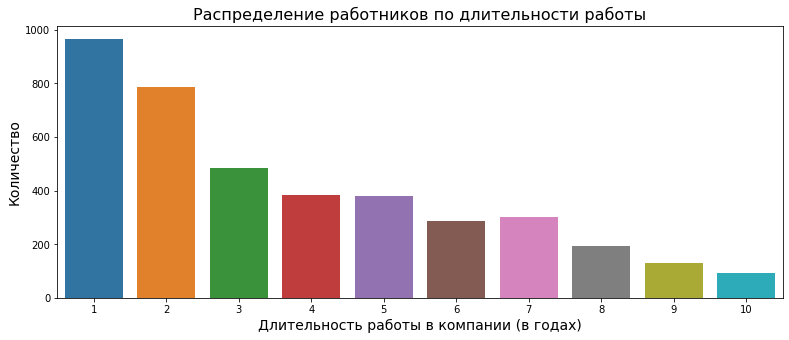

In [32]:
plt.figure(figsize=(13, 5))
sns.countplot(data=train_job_satisfaction_rate, x='employment_years')
plt.title('Распределение работников по длительности работы', fontsize=16)
plt.xlabel('Длительность работы в компании (в годах)', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show();

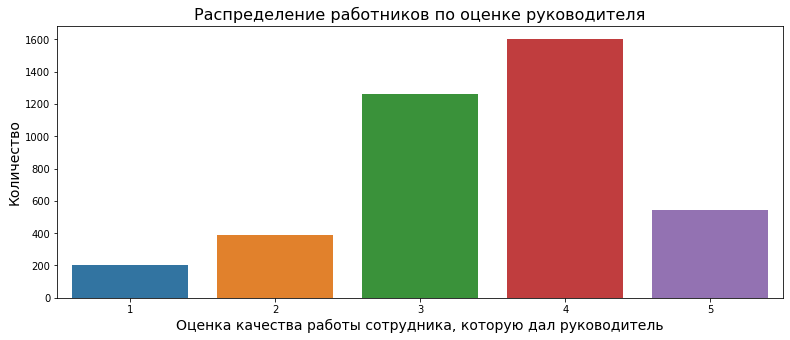

In [33]:
plt.figure(figsize=(13, 5))
sns.countplot(data=train_job_satisfaction_rate, x='supervisor_evaluation')
plt.title('Распределение работников по оценке руководителя', fontsize=16)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show();

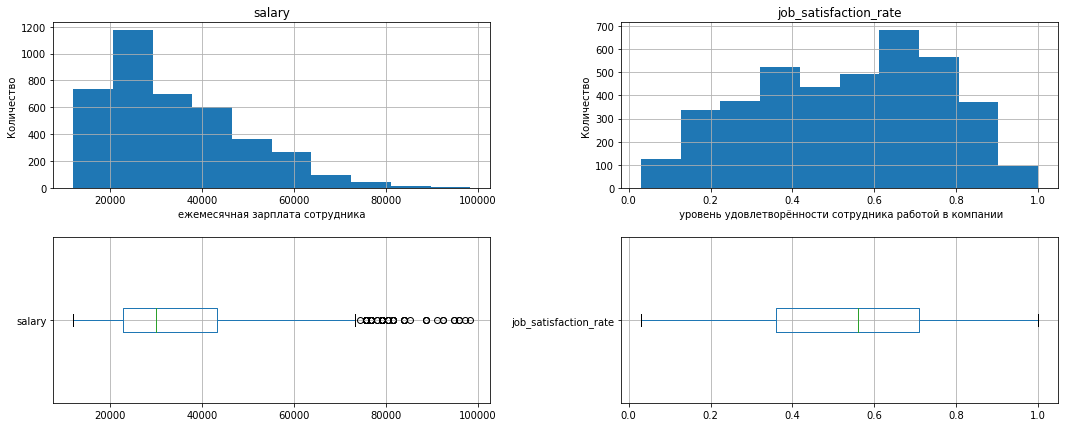

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(18, 7))

train_job_satisfaction_rate.hist('salary', ax=ax[0, 0])
train_job_satisfaction_rate.boxplot('salary', ax=ax[1, 0], vert=False)
ax[0, 0].set(xlabel='ежемесячная зарплата сотрудника', ylabel='Количество')

train_job_satisfaction_rate.hist('job_satisfaction_rate', ax=ax[0, 1])
train_job_satisfaction_rate.boxplot('job_satisfaction_rate', ax=ax[1, 1], vert=False)
ax[0, 1].set(xlabel=' уровень удовлетворённости сотрудника работой в компании', ylabel='Количество');

In [35]:
train_job_satisfaction_rate['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

#### тестовая таблица

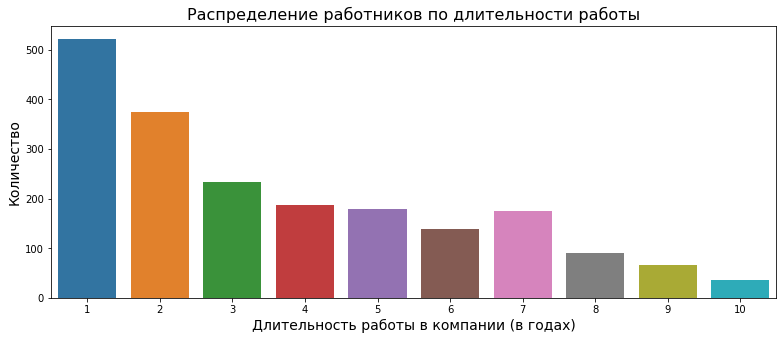

In [36]:
plt.figure(figsize=(13, 5))
sns.countplot(data=test_features, x='employment_years')
plt.title('Распределение работников по длительности работы', fontsize=16)
plt.xlabel('Длительность работы в компании (в годах)', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show();

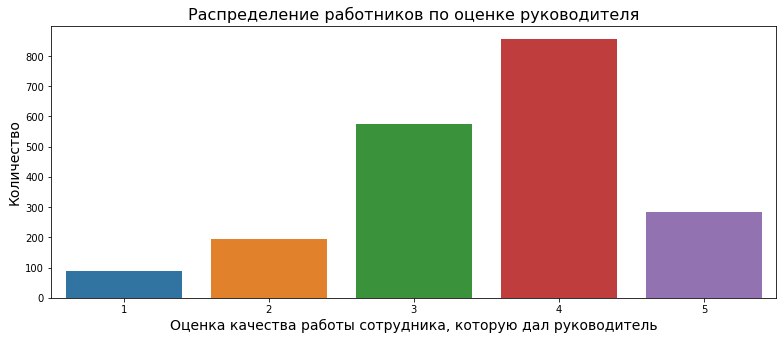

In [37]:
plt.figure(figsize=(13, 5))
sns.countplot(data=test_features, x='supervisor_evaluation')
plt.title('Распределение работников по оценке руководителя', fontsize=16)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show();

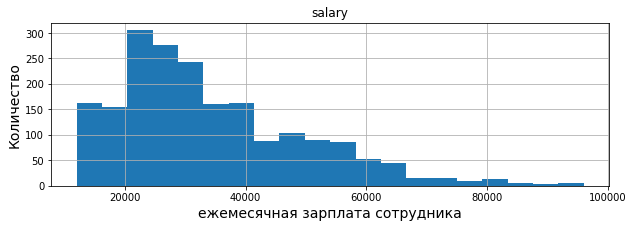

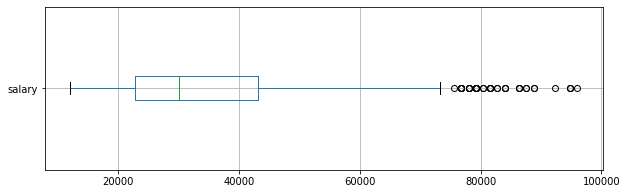

In [97]:
test_features.hist('salary', bins=20, figsize=(10, 3))
plt.xlabel('ежемесячная зарплата сотрудника', fontsize=14) 
plt.ylabel('Количество', fontsize=14)
plt.show()
test_features.boxplot('salary', vert=False, figsize=(10, 3));

In [39]:
test_features['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

#### таблица увольнения

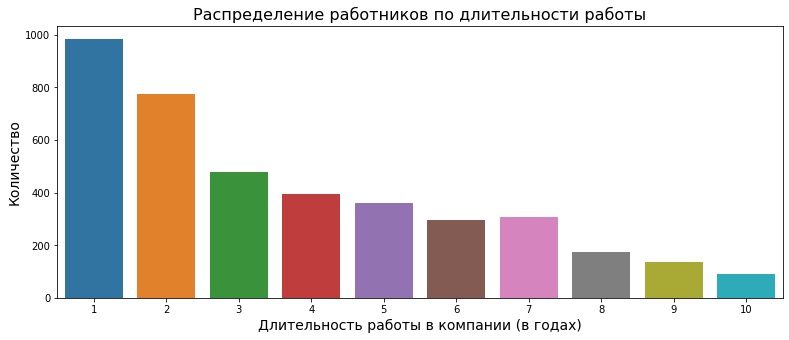

In [40]:
plt.figure(figsize=(13, 5))
sns.countplot(data=train_quit, x='employment_years')
plt.title('Распределение работников по длительности работы', fontsize=16)
plt.xlabel('Длительность работы в компании (в годах)', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show();

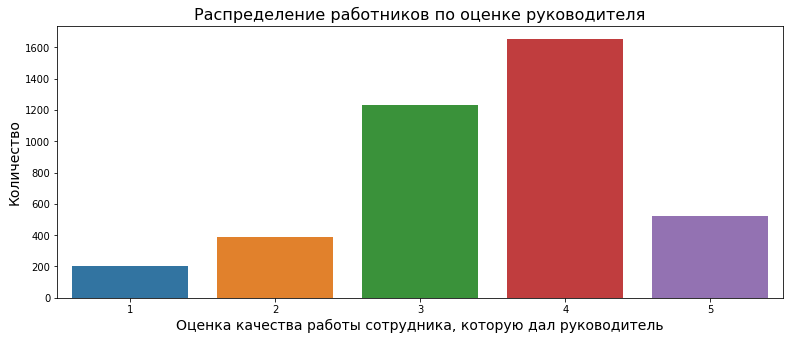

In [41]:
plt.figure(figsize=(13, 5))
sns.countplot(data=train_quit, x='supervisor_evaluation')
plt.title('Распределение работников по оценке руководителя', fontsize=16)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show();

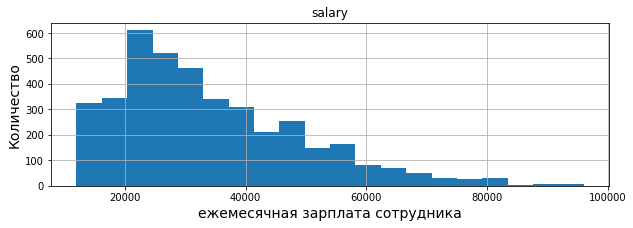

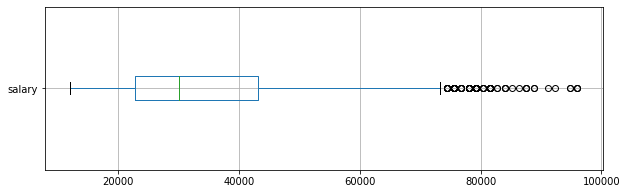

In [95]:
train_quit.hist('salary', bins=20, figsize=(10, 3))
plt.xlabel('ежемесячная зарплата сотрудника', fontsize=14) 
plt.ylabel('Количество', fontsize=14)
plt.show()
train_quit.boxplot('salary', vert=False, figsize=(10, 3));

In [43]:
train_quit['salary'].describe()

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

<a id='analysis2'></a>
### Категориальные графики

#### таблица удовлетворенности

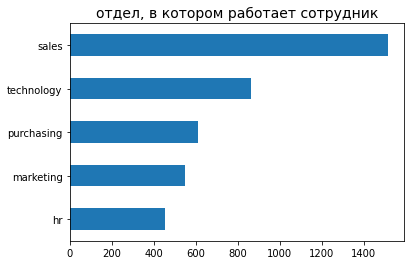

In [44]:
train_job_satisfaction_rate['dept'].value_counts(ascending=True).plot(kind='barh')
plt.title('отдел, в котором работает сотрудник', fontsize=14);

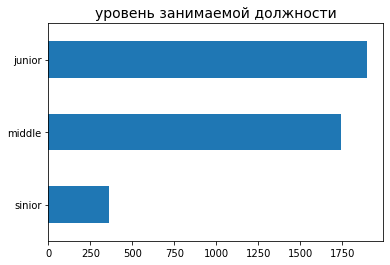

In [45]:
train_job_satisfaction_rate['level'].value_counts(ascending=True).plot(kind='barh')
plt.title('уровень занимаемой должности', fontsize=14);

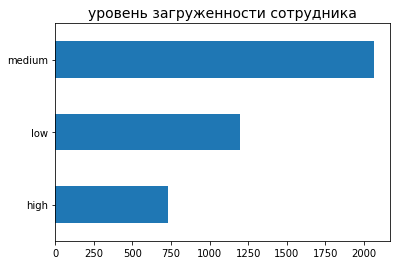

In [46]:
train_job_satisfaction_rate['workload'].value_counts(ascending=True).plot(kind='barh')
plt.title('уровень загруженности сотрудника', fontsize=14);

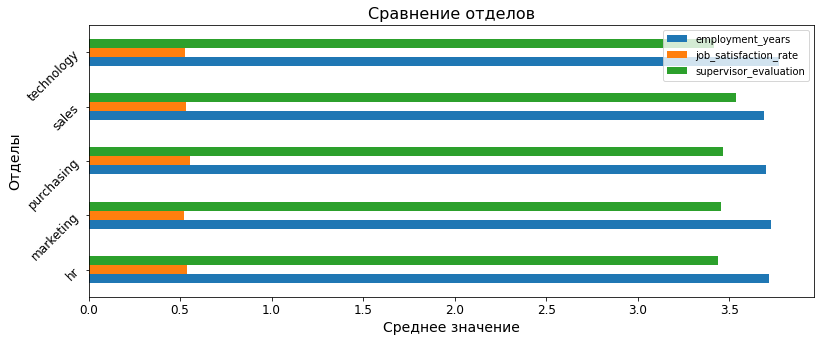

In [47]:
(train_job_satisfaction_rate.pivot_table(index=['dept'], 
                                         values=['employment_years', 'supervisor_evaluation', 
                                                 'job_satisfaction_rate'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12, rot=45)
)
plt.title('Сравнение отделов', fontsize=16)
plt.ylabel('Отделы', fontsize=14)
plt.xlabel('Среднее значение', fontsize=14);

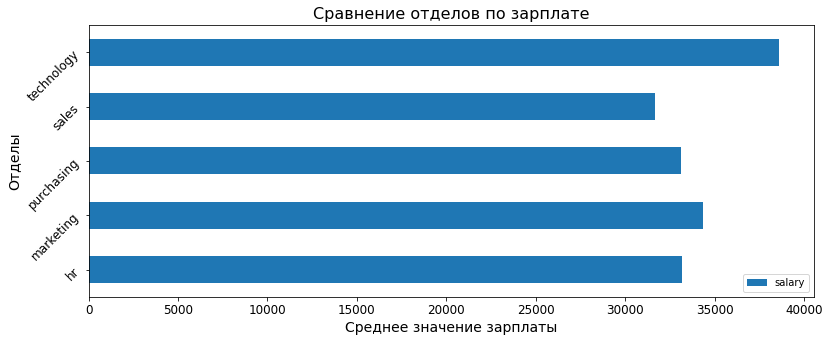

In [48]:
(train_job_satisfaction_rate.pivot_table(index=['dept'], 
                                         values=['salary'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12, rot=45)
)
plt.title('Сравнение отделов по зарплате', fontsize=16)
plt.ylabel('Отделы', fontsize=14)
plt.xlabel('Среднее значение зарплаты', fontsize=14);

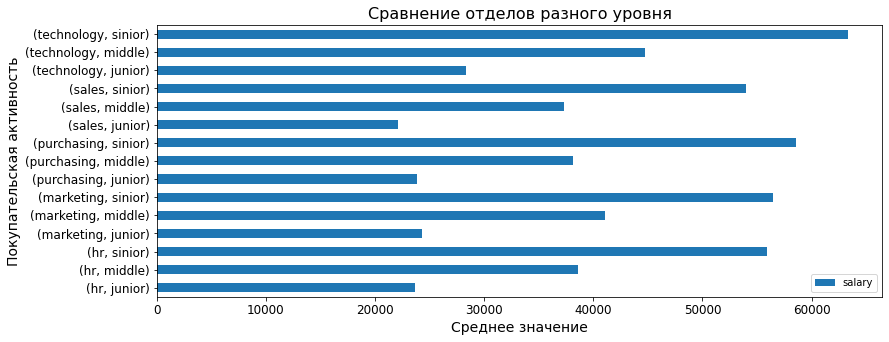

In [49]:
(train_job_satisfaction_rate.pivot_table(index=['dept', 'level'], 
                                         values=['salary'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('Сравнение отделов разного уровня', fontsize=16)
plt.ylabel('Покупательская активность', fontsize=14)
plt.xlabel('Среднее значение', fontsize=14);

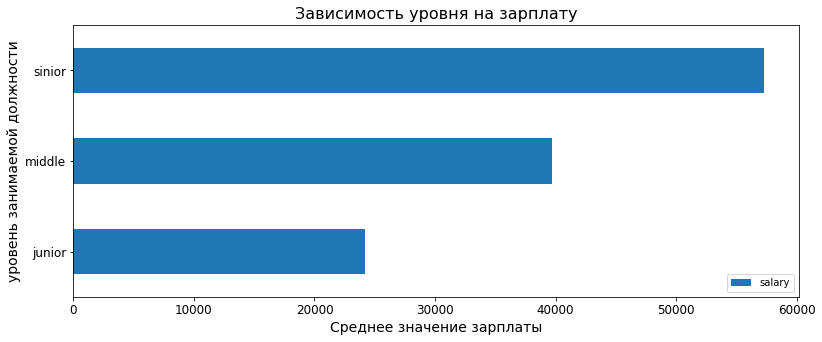

In [50]:
(train_job_satisfaction_rate.pivot_table(index=['level'], 
                                         values=['salary'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('Зависимость уровня на зарплату', fontsize=16)
plt.ylabel('уровень занимаемой должности', fontsize=14)
plt.xlabel('Среднее значение зарплаты', fontsize=14);

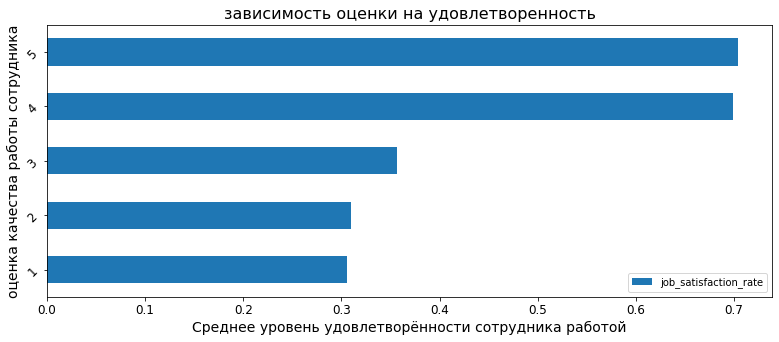

In [51]:
(train_job_satisfaction_rate.pivot_table(index=['supervisor_evaluation'], 
                                         values=['job_satisfaction_rate'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12, rot=45)
)
plt.title('зависимость оценки на удовлетворенность', fontsize=16)
plt.ylabel('оценка качества работы сотрудника', fontsize=14)
plt.xlabel('Среднее уровень удовлетворённости сотрудника работой', fontsize=14);

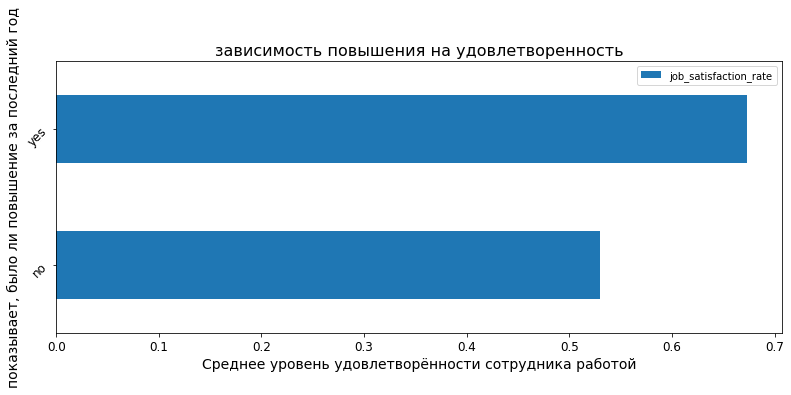

In [52]:
(train_job_satisfaction_rate.pivot_table(index=['last_year_promo'], 
                                         values=['job_satisfaction_rate'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12, rot=45)
)
plt.title('зависимость повышения на удовлетворенность', fontsize=16)
plt.ylabel('показывает, было ли повышение за последний год', fontsize=14)
plt.xlabel('Среднее уровень удовлетворённости сотрудника работой', fontsize=14);

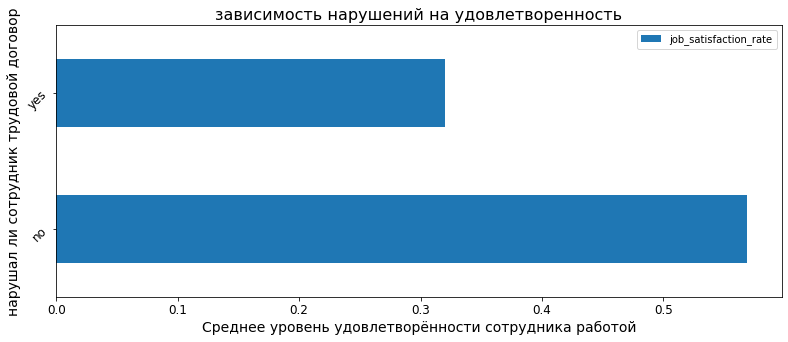

In [53]:
(train_job_satisfaction_rate.pivot_table(index=['last_year_violations'], 
                                         values=['job_satisfaction_rate'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12, rot=45)
)
plt.title('зависимость нарушений на удовлетворенность', fontsize=16)
plt.ylabel('нарушал ли сотрудник трудовой договор', fontsize=14)
plt.xlabel('Среднее уровень удовлетворённости сотрудника работой', fontsize=14);

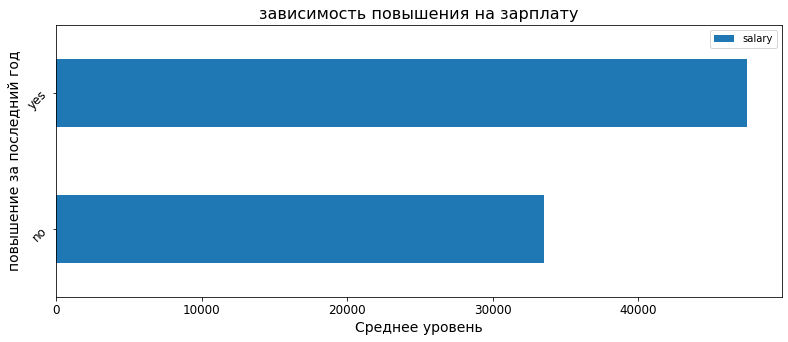

In [54]:
(train_job_satisfaction_rate.pivot_table(index=['last_year_promo'], 
                                         values=['salary'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12, rot=45)
)
plt.title('зависимость повышения на зарплату', fontsize=16)
plt.ylabel('повышение за последний год', fontsize=14)
plt.xlabel('Среднее уровень', fontsize=14);

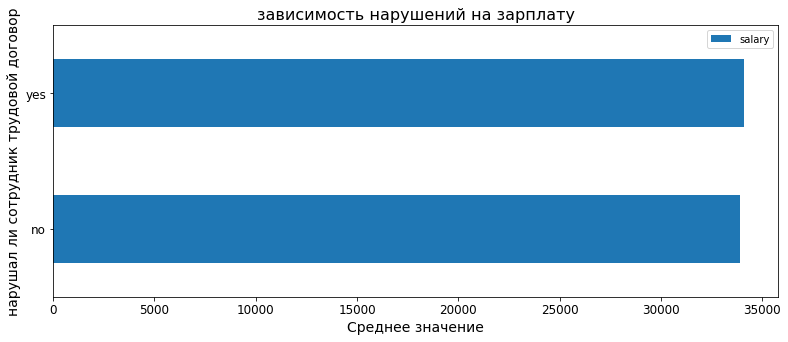

In [55]:
(train_job_satisfaction_rate.pivot_table(index=['last_year_violations'], 
                                         values=['salary'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('зависимость нарушений на зарплату', fontsize=16)
plt.ylabel('нарушал ли сотрудник трудовой договор', fontsize=14)
plt.xlabel('Среднее значение', fontsize=14);

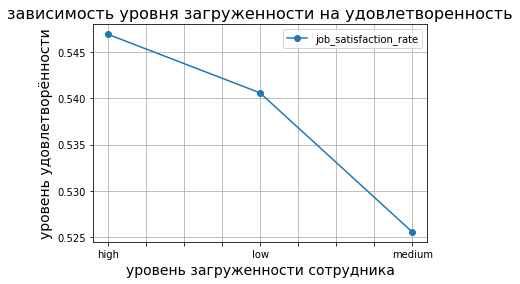

In [56]:
pivot_table = train_job_satisfaction_rate.pivot_table(index='workload', values='job_satisfaction_rate', aggfunc='mean')
pivot_table.plot(style='-o', grid=True)
plt.title('зависимость уровня загруженности на удовлетворенность', fontsize=16)
plt.ylabel('уровень удовлетворённости', fontsize=14)
plt.xlabel('уровень загруженности сотрудника', fontsize=14);

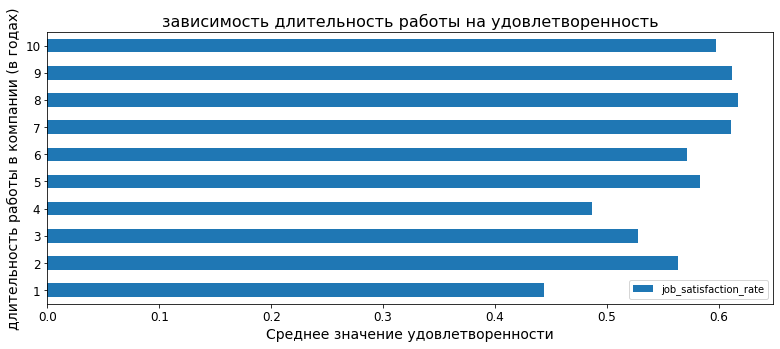

In [57]:
(train_job_satisfaction_rate.pivot_table(index=['employment_years'], 
                                         values=['job_satisfaction_rate'], 
                                         aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('зависимость длительность работы на удовлетворенность', fontsize=16)
plt.ylabel('длительность работы в компании (в годах)', fontsize=14)
plt.xlabel('Среднее значение удовлетворенности', fontsize=14);

#### таблица увольнения

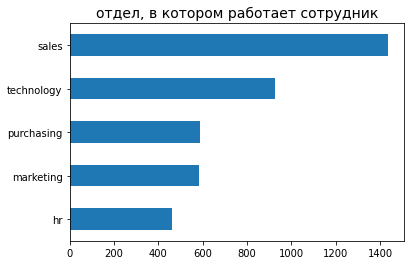

In [58]:
train_quit['dept'].value_counts(ascending=True).plot(kind='barh')
plt.title('отдел, в котором работает сотрудник', fontsize=14);

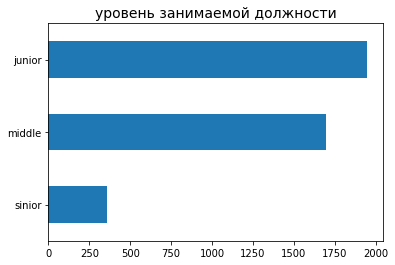

In [59]:
train_quit['level'].value_counts(ascending=True).plot(kind='barh')
plt.title('уровень занимаемой должности', fontsize=14);

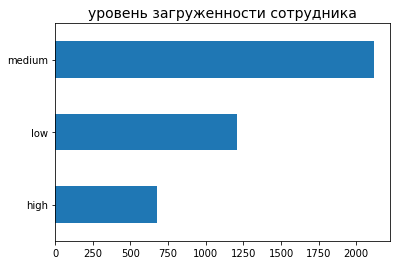

In [60]:
train_quit['workload'].value_counts(ascending=True).plot(kind='barh')
plt.title('уровень загруженности сотрудника', fontsize=14);

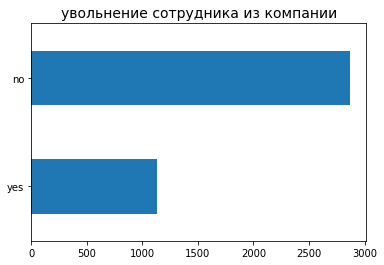

In [61]:
train_quit['quit'].value_counts(ascending=True).plot(kind='barh')
plt.title('увольнение сотрудника из компании', fontsize=14);

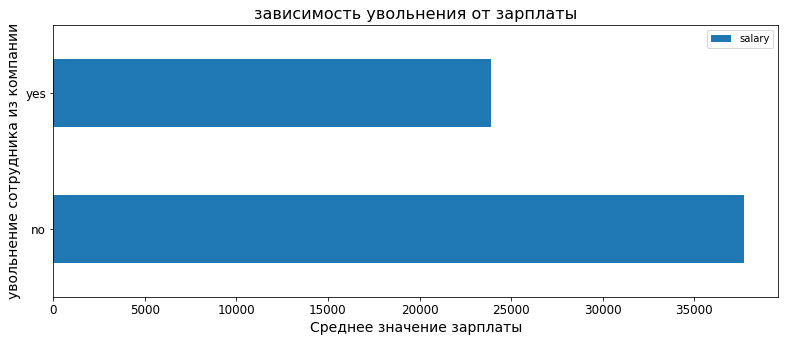

In [62]:
(train_quit.pivot_table(index=['quit'], values=['salary'], aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('зависимость увольнения от зарплаты', fontsize=16)
plt.ylabel('увольнение сотрудника из компании', fontsize=14)
plt.xlabel('Среднее значение зарплаты', fontsize=14);

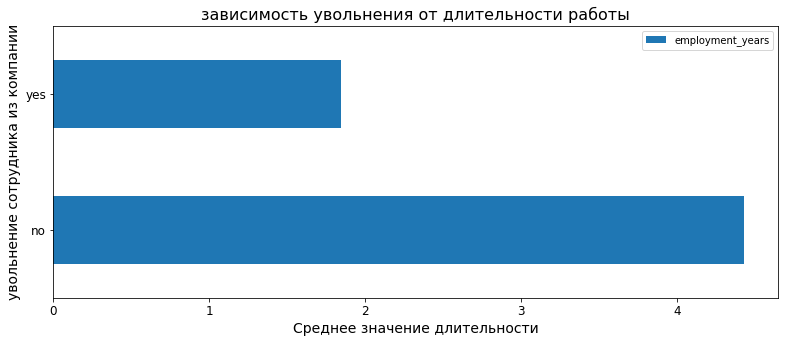

In [63]:
(train_quit.pivot_table(index=['quit'], values=['employment_years'], aggfunc='mean')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('зависимость увольнения от длительности работы', fontsize=16)
plt.ylabel('увольнение сотрудника из компании', fontsize=14)
plt.xlabel('Среднее значение длительности', fontsize=14);

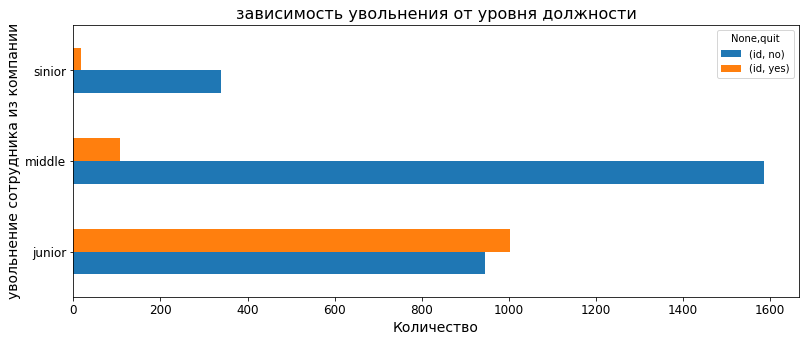

In [64]:
(train_quit.pivot_table(index=['level'], columns='quit', values=['id'], aggfunc='count')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('зависимость увольнения от уровня должности', fontsize=16)
plt.ylabel('увольнение сотрудника из компании', fontsize=14)
plt.xlabel('Количество', fontsize=14);

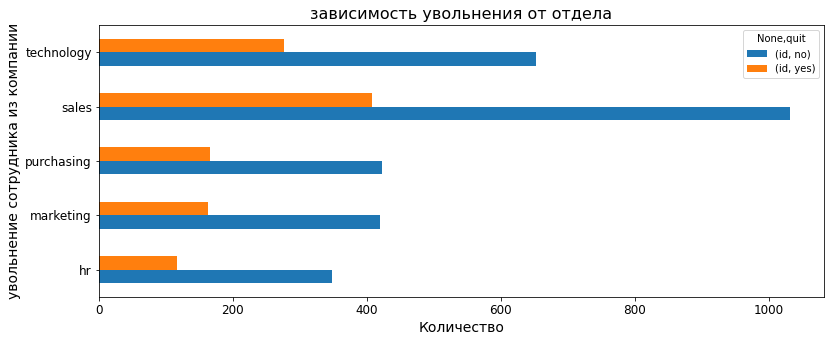

In [65]:
(train_quit.pivot_table(index=['dept'], columns='quit', values=['id'], aggfunc='count')
 .plot(kind='barh', figsize=(13,5), fontsize=12)
)
plt.title('зависимость увольнения от отдела', fontsize=16)
plt.ylabel('увольнение сотрудника из компании', fontsize=14)
plt.xlabel('Количество', fontsize=14);

In [66]:
test_target = test_target_quit.merge(test_target_job_satisfaction_rate, on='id')

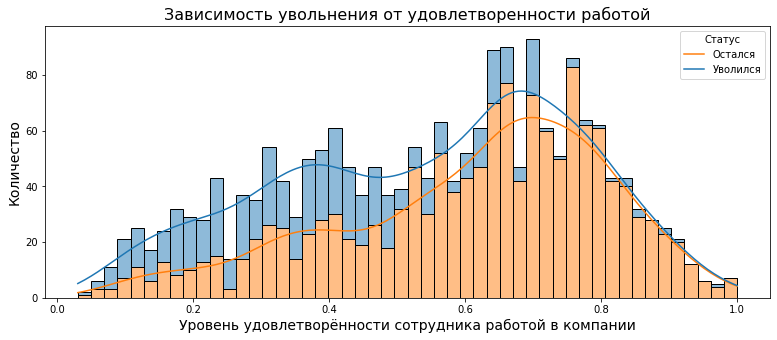

In [67]:
plt.figure(figsize=(13, 5))
sns.histplot(data=test_target, x='job_satisfaction_rate', hue='quit', multiple='stack', bins=50, kde=True)
plt.title('Зависимость увольнения от удовлетворенности работой', fontsize=16)
plt.xlabel('Уровень удовлетворённости сотрудника работой в компании', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.legend(title='Статус', loc='upper right', labels=['Остался', 'Уволился'])
plt.show()

<a id='correlation'></a>
### Коэффициенты корреляции `heatmap` уровня удовлетворённости сотрудника

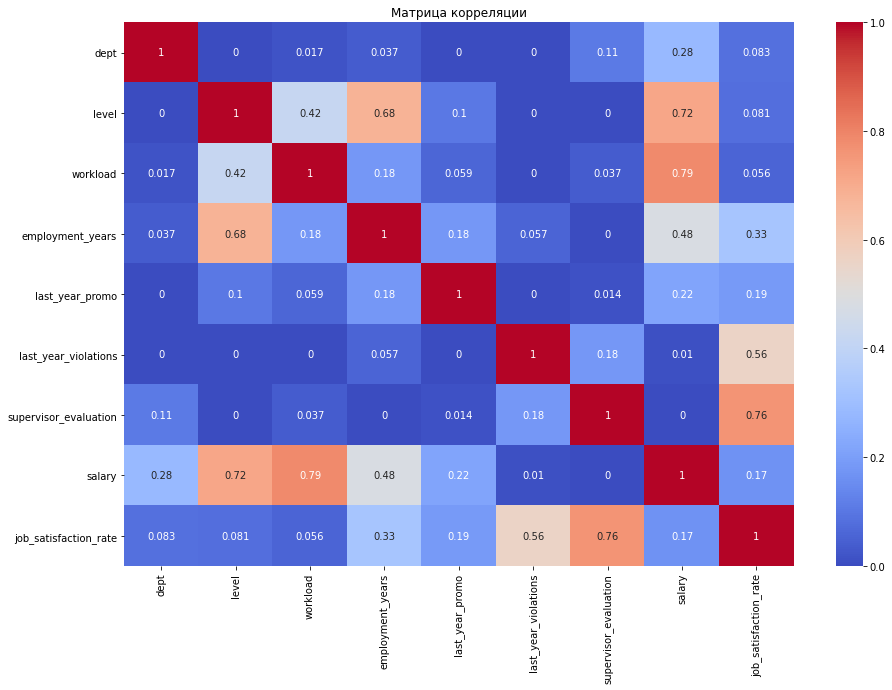

In [68]:
list_columns = ['salary', 'job_satisfaction_rate']
corr_matrix = train_job_satisfaction_rate.drop('id', axis=1).phik_matrix(interval_cols = list_columns)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

#### Коэффициенты корреляции `heatmap` увольнения сотрудника

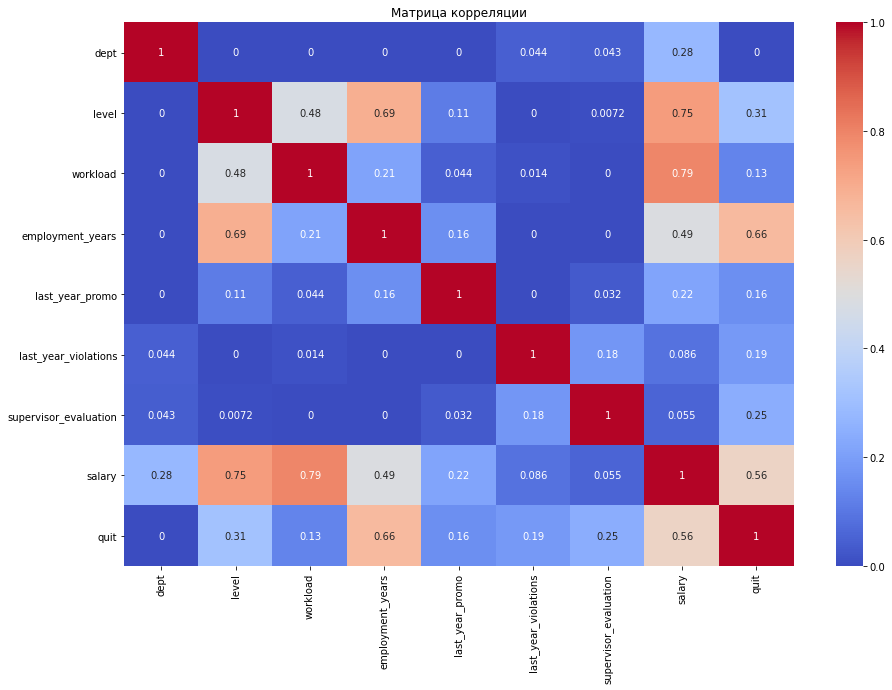

In [69]:
list_columns = ['salary']
corr_matrix = train_quit.drop('id', axis=1).phik_matrix(interval_cols = list_columns)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

#### Коэффициенты корреляции `heatmap` тестовой выборки

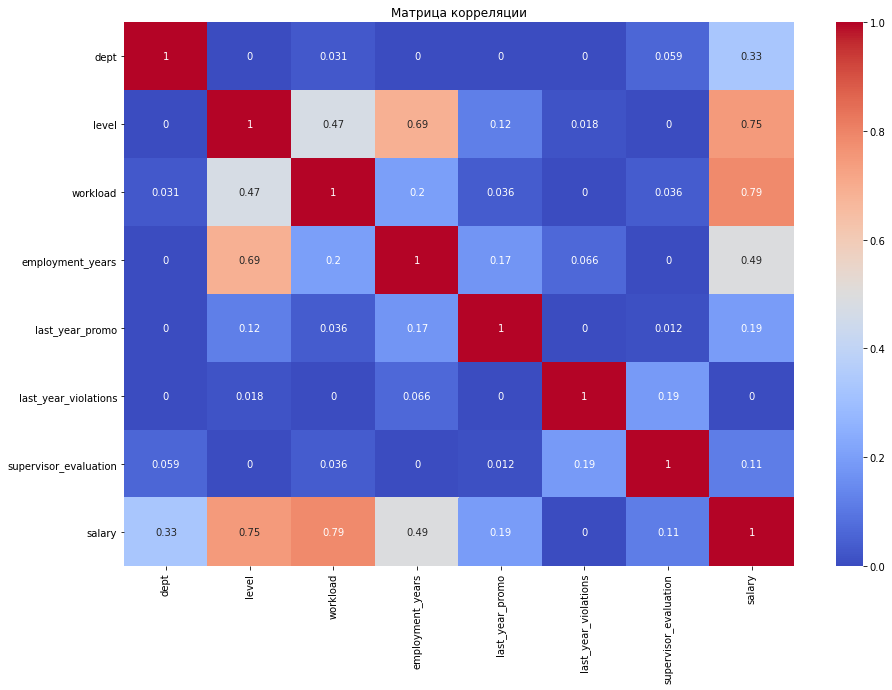

In [70]:
list_columns = ['salary']
corr_matrix = test_features.drop('id', axis=1).phik_matrix(interval_cols = list_columns)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

**Вывод** Исследовав данные таблицы, выявили, что уровень удовлетворённости сотрудника работой в компании больше всего зависит от оценки руководителя, а также от нарушений. 
На увольнение в большей степерни влияет продолжительность работы и зарплата. Также на графике видно соотношение увольнений от удовлетворённости. А зарплата в свою очередь зависит от уровня и должности. Больше всего увольнений в отделе продаж и технологий.

<a id='split'></a>
## Подготовка данных в пайплайне

In [71]:
ohe_columns = ['last_year_violations', 'last_year_promo']
ord_columns = ['dept', 'level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [72]:
# Создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), ohe_columns),
     ('ord', OrdinalEncoder(), ord_columns),
     ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [73]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [74]:
param_grid = [
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели LassoLars() 
    {
        'models': [linear_model.LassoLars()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None, 5, 10, 20, 50],
        'models__max_features': range(5, 10),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»)

In [75]:
#Создаём функцию для вычисления новой метрики
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = (error / scale).mean()
    return result * 100

#     return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [76]:
smape_scorer = make_scorer(smape, greater_is_better=False)

<a id='result'></a>
## Обучение моделей

<a id='result1'></a>
### Предсказание уровня удовлетворённости сотрудника

In [77]:
sorted_test_features = test_features.sort_values(by='id')

In [78]:
sorted_test_target_job = test_target_job_satisfaction_rate.sort_values(by='id')

In [79]:
# Разделяем данные на тренировочные и тестовые
X_train = train_job_satisfaction_rate.drop(['id', 'job_satisfaction_rate'], axis=1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']
X_test = sorted_test_features.drop('id', axis=1)
y_test = sorted_test_target_job['job_satisfaction_rate']

In [80]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# Оценка модели на тестовой выборке
best_model = randomized_search.best_estimator_
test_score = smape(y_test, best_model.predict(X_test))

print('Метрика лучшей модели на тестовой выборке:', test_score)

# Успешность
if test_score <= 15:
    print('Успех! SMAPE ≤ 15')
else:
    print('Не удалось достичь SMAPE ≥ 15.')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['last_year_violations',
                                                   'last_year_promo']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['dept', 'level',
                                                   'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years', 'salary',
                                                   'supervisor_evaluation'])])),
                ('models',
                 DecisionTreeRe

**Вывод**: Обучили парочку линейных моделей, а также дерево решений. Подобрав гиперпараметры для дерева решений, получили лучшую модель с параметрами: DecisionTreeRegressor(max_features=9, min_samples_leaf=3, random_state=42), которая также удовлетворяет даным по метрике.

<a id='result2'></a>
### Предсказание увольнения сотрудника из компании

In [81]:
all_test = test_features.merge(test_target, on='id')

In [82]:
perc_100 = all_test['dept'].value_counts()

In [83]:
perc_quit =all_test[all_test['quit'] == 'yes']['dept'].value_counts()

In [84]:
perc_quit / perc_100

hr            0.286344
marketing     0.240143
purchasing    0.285714
sales         0.296345
technology    0.279121
Name: dept, dtype: float64

In [85]:
stayed = all_test[all_test['quit'] == 'no']['job_satisfaction_rate']
left = all_test[all_test['quit'] == 'yes']['job_satisfaction_rate']

alpha = 0.05
# Выполнение t-теста
t_stat, p_value = st.ttest_ind(stayed, left, equal_var=False)

print(f'T-статистика: {t_stat}, P-значение: {p_value}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

T-статистика: 23.795097591114743, P-значение: 2.7708628031543735e-101
Отвергаем нулевую гипотезу


Нулевая гипотеза заключалась в том, что средние значения `job_satisfaction_rate` между двумя группами равны. Можно сделать вывод, что есть различие в уровне удовлетворенности работой между ушедшими и оставшимися работниками. Это может говорить о том, что работники, которые уходят, имеют значительно более низкие оценки удовлетворенности работой по сравнению с теми, кто остается в компании.

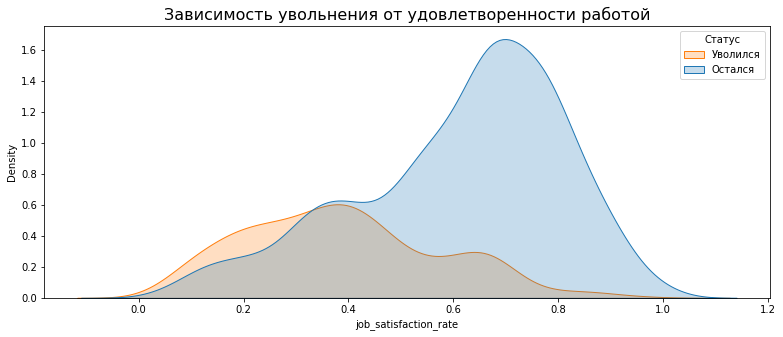

In [86]:
plt.figure(figsize=(13, 5))
sns.kdeplot(data=all_test, x='job_satisfaction_rate', hue='quit', fill= True)
plt.title('Зависимость увольнения от удовлетворенности работой', fontsize=16)
plt.legend(title='Статус', loc='upper right', labels=['Уволился', 'Остался'])
plt.show()

In [87]:
y_pred_best_model_train = best_model.predict(X_train)

In [88]:
sorted_test_target_quit = test_target_quit.sort_values(by='id')

In [89]:
X_train =  train_quit.drop(['id', 'quit'], axis=1)
y_train = label_encoder.fit_transform(train_quit['quit'])
X_test = sorted_test_features.drop('id', axis=1)
y_test = label_encoder.transform(sorted_test_target_quit['quit'])

In [90]:
X_train['job_satisfaction_rate'] = y_pred_best_model_train

In [91]:
X_test['job_satisfaction_rate'] = best_model.predict(X_test)

In [92]:
# создаём списки с названиями признаков
ohe_columns = ['last_year_promo', 'last_year_violations']
ord_columns = ['dept', 'level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [93]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': [None, 10, 20, 50],
        'models__max_features': [2, 5, 8],
        'models__min_samples_leaf': [1, 5, 8],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# Проверка на тестовой выборке
y_test_proba = randomized_search.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.2f}')

# Успешность
if roc_auc >= 0.91:
    print('Успех! ROC-AUC ≥ 0.91.')
else:
    print('Не удалось достичь ROC-AUC ≥ 0.91.')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['last_year_violations',
                                                   'last_year_promo']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['dept', 'level',
                                                   'workload']),
                                                 ('num', 'passthrough',
                                                  ['employment_years', 'salary',
                                                   'supervisor_evaluation'])])),
                ('models',
                 DecisionTreeClass

**Вывод**: Обучив несколько моделей классификаций для второй задачи, также определили лучшую модель, удовлетворяющей метрике. Лучшей модель стало дерево решений DecisionTreeRegressor(max_features=9, min_samples_leaf=3, random_state=42) Получается, что в первой, что и во второй задачах лучшими модели стали деревья. Думаю это и ожидалось, так как деревья решений имеют много листьев и проще подобрать

<a id='conclusion'></a>
## Вывод

**Вывод:** 

Изначально были даны таблицы:

Для задачи 1: 
* Тренировочная выборка: "train_job_satisfaction_rate.csv"
* Входные признаки тестовой выборки: "test_features.csv"
* Целевой признак тестовой выборки: "test_target_job_satisfaction_rate.csv"

Для задачи 2:
* Тренировочная выборка: "train_quit.csv"
* Входные признаки тестовой выборки те же, что и в задаче 1: "test_features.csv"
* Целевой признак тестовой выборки: "test_target_quit.csv"

`id` — уникальный идентификатор сотрудника;
`dept` — отдел, в котором работает сотрудник;
`level` — уровень занимаемой должности;
`workload` — уровень загруженности сотрудника;
`employment_years` — длительность работы в компании (в годах);
`last_year_promo` — показывает, было ли повышение за последний год;
`last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
`supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
`salary` — ежемесячная зарплата сотрудника;
`job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Проделана подготовительная работа, изучены данные, заполнены пропуски, построены и изучены графики. Обучены модели для решения задач. Первая задача предсказать уровень удовлетворенности сотрудника, где главным признаком является оценка руководителя и не получение штрафов, ну и конечно поощрения в виде повышения и зарплате. Ведь удовлетворенность связана и со второй задачей в которой надо предсказать уволиться ли сотрудник, основной признак это длительность работы, а также зарплата.  

Исходя из исследований можно составить портрет сотрудника, который уволится. Это каждый 3-4 молодой специалист, джуниор, с зарплатой ниже 25т.р., работающий от силы 2 года в компании, у которого удовлетворенность ниже 40%. В каждом отделе текучка почти 30%.
Возможно надо пересмотреть политику компании. 2000 сотрудников это конечно крупная компания, но текучка большая. Для снижения текучести кадров необходимо грамотно организовать процесс подбора кандидатов, предоставить наставника на период адаптации и создать условия для личностного и карьерного роста сотрудников.